# Analysis Data Project with Python : E-Commerce Dataset 
- Name  : Muhammad Nandaarjuna Fadhillah
- Email : muhammadnandaaf@gmail.com
- Id    : muhammadnanda

## Defining Business Questions
1. Bagaimana distribusi pelanggan berdasarkan lokasi geografis?
2. Bagaimana tren penjualan bulanan dan tahunan?
3. Berapa banyak pelanggan yang memberikan ulasan atau peringkat di atas 4?
4. Kategori Produk mana yang paling banyak dan paling sedikit terjual?
5. Bagaimana pelanggan membayar produk yang mereka pesan atau beli?

## Prepare The Required Library 

In [41]:
# Import the Library

# Data Manipulation Libraries
from IPython.display import display
import numpy as np
import pandas as pd

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
import matplotlib.image as mpimg
import io
from PIL import Image

# Ignore Warning
import warnings
warnings.filterwarnings('ignore') 

## Data Wrangling
Data wrangling adalah suatu proses atau serangkaian kegiatan yang mencakup pengumpulan data, penilaian data, dan pembersihan data sebelum digunakan dalam proses analisis data.

### Gathering Data
Dalam proses ini, mengumpulkan semua data yang diperlukan untuk menjawab pertanyaan bisnis atau mengatasi masalah yang ingin diselesaikan.


In [42]:
# Load the dataset 
dir = "Data/E-Commerce Public Dataset/"

orders = pd.read_csv(dir + 'orders_dataset.csv')
items = pd.read_csv(dir + 'order_items_dataset.csv')
products = pd.read_csv(dir + 'products_dataset.csv')
payments = pd.read_csv(dir + 'order_payments_dataset.csv')
reviews = pd.read_csv(dir + 'order_reviews_dataset.csv')
customers = pd.read_csv(dir + 'customers_dataset.csv')
sellers = pd.read_csv(dir + 'sellers_dataset.csv')
geolocation = pd.read_csv(dir + 'geolocation_dataset.csv')
category = pd.read_csv(dir + 'product_category_name_translation.csv')

data = {'orders': orders,
        'items': items,
        'products': products,
        'payments': payments,
        'reviews': reviews,
        'customers': customers,
        'sellers': sellers,
        'geo': geolocation,
        'category': category}

In [43]:
print("Cell 1: Orders")
display(data['orders'].head())

print("\nCell 2: Items")
display(data['items'].head())

print("\nCell 3: Products")
display(data['products'].head())

print("\nCell 4: Payments")
display(data['payments'].head())

print("\nCell 5: Reviews")
display(data['reviews'].head())

print("\nCell 6: Customers")
display(data['customers'].head())

print("\nCell 7: Sellers")
display(data['sellers'].head())

print("\nCell 8: Geolocations")
display(data['geo'].head())

print("\nCell 9: Category")
display(data['category'].head())


Cell 1: Orders


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00



Cell 2: Items


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14



Cell 3: Products


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0



Cell 4: Payments


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45



Cell 5: Reviews


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53



Cell 6: Customers


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP



Cell 7: Sellers


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP



Cell 8: Geolocations


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP



Cell 9: Category


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### Assesing Data
Proses ini dilakukan untuk menilai kualitas dan struktur suatu kumpulan data. Selain itu, proses ini juga bertujuan untuk mengidentifikasi berbagai masalah dalam data, seperti nilai yang hilang, nilai yang tidak terstandarisasi, dll.

In [44]:
print("Check Data Type")
print("\n" + "="*70 + "\n")
for name, df in data.items():
    print(f"Cell: {name}")
    print(df.info(verbose=True))
    print("\n" + "="*70 + "\n")


Check Data Type


Cell: orders
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None


Cell: items
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  


In [45]:
print("Check Null Data")
print("\n" + "="*70 + "\n")
for name, df in data.items():
    print(f"Cell: {name}")
    print(df.isna().sum())
    print("\n" + "="*70 + "\n")

Check Null Data


Cell: orders
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


Cell: items
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


Cell: products
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


Cell: payments
order_id                0
payment_sequential      0
payment_type            0
payment_installment

Datasets with missing values:
1. Orders Dataset
   - order_approved_at = 160 pesanan tidak disetujui atau dibatalkan.
   - order_delivered_carrier_date = 1,783 Pesanan belum dikirim atau diproses oleh kurir.
   - order_delivered_customer_date = 2,965 pesanan tidak diselesaikan atau dibatalkan untuk pelanggan.

2. Products Dataset
   - product_category_name = 610 produk tidak memiliki kategori.
   - product_name_lenght = 610 produk yang tidak memiliki kategori juga tidak memiliki informasi panjang nama.
   - product_description_lenght = 610 deskripsi produk juga hilang.
   - product_photos_qty = 610 produk tidak memiliki informasi tentang jumlah foto.
   - product_weight_g = 2 produk tidak memiliki informasi berat.
   - product_length_cm = 2 produk tidak memiliki dimensi panjang.
   - product_height_cm = 2 produk tidak memiliki dimensi tinggi.
   - product_width_cm = 2 produk tidak memiliki dimensi lebar.

3. Reviews Dataset
   - review_comment_title =  87,656 reviews tidak memiliki judul.
   - review_comment_message = 58,247 reviews tidak mengandung komentar apa pun.

In [46]:
print("Check Duplicated Data")
for name, df in data.items():
    print(f"{name:10} : {df.duplicated().sum()}")

Check Duplicated Data
orders     : 0
items      : 0
products   : 0
payments   : 0
reviews    : 0
customers  : 0
sellers    : 0
geo        : 261831
category   : 0


Pemeriksaan kumpulan data ini menunjukkan bahwa semua kumpulan data tidak memiliki duplikat kecuali geolokasi, yang berjumlah 261.831, data duplikat ini tidak perlu di-drop_duplicates() karena data ini dipertahankan untuk distribusi geografis agar tidak kehilangan informasi lokasi yang digunakan oleh pelanggan atau penjual.

In [47]:
print("Describe Data")
print("\n" + "="*70 + "\n")
for name, df in data.items():
    print(f"Cell: {name}")
    print(df.describe(include='all'))
    print("\n" + "="*70 + "\n")

Describe Data


Cell: orders
                                order_id                       customer_id  \
count                              99441                             99441   
unique                             99441                             99441   
top     66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   
freq                                   1                                 1   

       order_status order_purchase_timestamp    order_approved_at  \
count         99441                    99441                99281   
unique            8                    98875                90733   
top       delivered      2018-08-02 12:05:26  2018-02-27 04:31:10   
freq          96478                        3                    9   

       order_delivered_carrier_date order_delivered_customer_date  \
count                         97658                         96476   
unique                        81018                         95664   
top             2018-05-09 

Pemeriksaan statistik ini berguna untuk melihat ringkasan distribusi data dengan cepat.

### Cleaning Data
Apabila pada proses sebelumnya kita menemukan masalah (missing value, outlier, dll.) yang terdapat di dalam sebuah data, masalah tersebut harus dibersihkan sebelum masuk tahap analisis data. Terdapat beberapa teknik yang dapat kita gunakan untuk membersihkan data. Seluruh teknik tersebut akan kita pelajari pada beberapa materi ke depan.

pada tahapan data cleaning (pembersihan data) ini dilakukan : 
- Orders Dataset 
1. Terdapat tipe data yang tidak sesuai dimana pada kolom yang berisi tanggal menggunakan tipe data object dan akan diganti menjadi tipe data datetime, kolom tipe data object yang diubah menjadi datetime :
   - order_purchase_timestamp
   - order_approved_at
   - order_delivered_carrier_date
   - order_delivered_customer_date
   - order_estimated_delivery_date
2. Terdapat nilai null pada kolom "order_approved_at, order_delivered_carrier_date, order_delivered_customer_date", kemungkinan besar pesanan dibatalkan, belum dikirim, dan lainnya sesuai kolom 'order_status' maka akan di isi dengan NaT (Not A Time) agar tetap sesuai format datetime, dan tidak mengubah informasi di dalam nya

- Products Dataset
1. Terdapat nilai null pada beberapa kolom di dataset products, seperti :
   - product_category_name
   - product_name_lenght
   - product_description_lenght	
   - product_photos_qty
   - product_weight_g
   - product_length_cm	
   - product_height_cm	
   - product_width_cm
    
    nilai null tersebut akan di isi dengan nilai yang relevan

- Reviews Dataset
1. Terdapat 2 kolom yang memiliki nilai null, yaitu :
   - review_comment_title
   - review_comment_message

   kolom yang memiliki nilai null tersebut akan diberikan nilai string "No Title" dan "No Comment"
2. Terdapat kolom yang memiliki nilai datetime tapi menggunakan tipe data object, yaitu :
   - review_creation_date
   - review_answer_timestamp
    
    maka akan diganti menggunakan tipe data datetime

- Items Dataset
1. Terdapat kolom yang memiliki nilai datetime tapi menggunakan tipe data object, yaitu :
   - shipping_limit_date

   maka akan diganti menggunakan tipe data datetime


#### Cleaning Orders Dataset

In [48]:
orders[orders['order_status'].isin(['canceled', 'shipped','unavailable','invoiced','processing'])]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


In [49]:
# Mengonversi tipe data object ke datetime
date_columns = ['order_purchase_timestamp', 'order_approved_at', 
                'order_delivered_carrier_date', 'order_delivered_customer_date', 
                'order_estimated_delivery_date']

for col in date_columns:
    orders[col] = pd.to_datetime(orders[col], errors='coerce')

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [50]:
orders[orders['order_status'].isin(['canceled', 'shipped','unavailable','invoiced','processing'])]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


#### Cleaning Products Dataset

In [51]:
# Mengisi nilai null dengan nilai yang relevan sesuai dari kolom yang tersedia

# Pada kolom category diisi dengan nilai unkown
products['product_category_name'].fillna('unknown', inplace=True)

# Pada kolom lainnya yang memiliki nilai null dan tipe data float akan diberikan nilai median
for col in ['product_name_lenght', 'product_description_lenght', 'product_photos_qty']:
    products[col].fillna(products[col].median(), inplace=True)

for col in ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']:
    products[col].fillna(products[col].median(), inplace=True)

products.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

#### Cleaning Reviews Dataset

In [52]:
# Mengisi nilai null dengan teks default 
reviews['review_comment_title'].fillna("No Title", inplace=True)
reviews['review_comment_message'].fillna("No Comment", inplace=True)

reviews.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [53]:
date_columns = ['review_creation_date','review_answer_timestamp']

for col in date_columns:
    reviews[col] = pd.to_datetime(reviews[col], errors='coerce')

reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


#### Cleaning Items Dataset

In [54]:
# Mengonversi tipe data object ke datetime
items['shipping_limit_date'] = pd.to_datetime(items['shipping_limit_date'], errors='coerce')

items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


## Exploratory Data Analysis (EDA) 
proses analisis data yang bertujuan untuk mengeksplorasi dan mengenal sebuah data. Pada prosesnya sering kali mulai dengan mendefinisikan berbagai pertanyaan atau hanya menggali data guna menemukan beberapa insight yang menarik dari sebuah data. Pada proses ini, terkadang kita juga menerapkan visualisasi data sederhana yang bertujuan untuk memvalidasi insight yang diperoleh.

### Explore Dataset

#### Explore Geolocations, Customers, and Sellers Dataset

In [55]:
# Menggabungkan 2 Dataset untuk mencari insight lebih lanjut
geo_customers_df = pd.merge(
    left=geolocation,
    right=customers,
    how="left",
    left_on="geolocation_zip_code_prefix",
    right_on="customer_zip_code_prefix"
)
geo_customers_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,1037,-23.545621,-46.639292,sao paulo,SP,05b005e82f3f2dcc41b5504f00484e50,3ef8c1513fc80fb905ccd8d57da5e9b8,1037.0,sao paulo,SP
1,1037,-23.545621,-46.639292,sao paulo,SP,19ee522d0dd140702062bb89e4820e19,8e7b6c489f1fe794c0ca58c80868a24b,1037.0,sao paulo,SP
2,1037,-23.545621,-46.639292,sao paulo,SP,6519f59a7687a4661f7c8a7e24f28f94,324ce23e08a1768007118a11836ea7d3,1037.0,sao paulo,SP
3,1046,-23.546081,-46.644820,sao paulo,SP,9a02295e3381803554347ab4dc1ab41b,182491a144858edd68163675689069d6,1046.0,sao paulo,SP
4,1046,-23.546081,-46.644820,sao paulo,SP,51795c9dc161dc05ef36dc8460dfa7e7,86ef1d99643569be4c21378742544d2e,1046.0,sao paulo,SP


In [56]:
geo_customers_df.groupby(by=["customer_city","customer_state"]).customer_id.nunique().sort_values(ascending=False).reset_index().head(10)


,customer_city,customer_state,customer_id
0,sao paulo,SP,15538
1,rio de janeiro,RJ,6882
2,belo horizonte,MG,2773
3,brasilia,DF,1960
4,curitiba,PR,1521
5,campinas,SP,1444
6,porto alegre,RS,1379
7,salvador,BA,1241
8,guarulhos,SP,1189
9,sao bernardo do campo,SP,938


In [57]:
# Menggabungkan 2 Dataset untuk mencari insight lebih lanjut
geo_sellers_df = pd.merge(
    left=geolocation,
    right=sellers,
    how="right",
    left_on="geolocation_zip_code_prefix",
    right_on="seller_zip_code_prefix"
)
geo_sellers_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,13023.0,-22.898536,-47.063125,campinas,SP,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,13023.0,-22.895499,-47.061944,campinas,SP,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
2,13023.0,-22.891740,-47.060820,campinas,SP,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
3,13023.0,-22.895762,-47.066144,campinas,SP,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
4,13023.0,-22.896154,-47.062431,campinas,SP,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP


In [58]:
geo_sellers_df.groupby(by=["seller_city","seller_state"]).seller_id.nunique().sort_values(ascending=False).reset_index().head(10)

,seller_city,seller_state,seller_id
0,sao paulo,SP,694
1,curitiba,PR,124
2,rio de janeiro,RJ,93
3,belo horizonte,MG,66
4,ribeirao preto,SP,52
5,guarulhos,SP,50
6,ibitinga,SP,49
7,santo andre,SP,45
8,campinas,SP,41
9,maringa,PR,40


In [59]:
# Gabungkan Dataset Geolocation dengan Semua Dataset yang terkait

all_Geo_df = pd.merge(
    left=geo_customers_df,
    right=sellers,
    how="right",
    left_on="geolocation_zip_code_prefix",
    right_on="seller_zip_code_prefix"
)

all_Geo_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,13023.0,-22.898536,-47.063125,campinas,SP,f861df6a9d89749b16e001dcc96f3011,0c543525744d6929abf36c89a8fded26,13023.0,campinas,SP,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,13023.0,-22.898536,-47.063125,campinas,SP,ed88480ce4b4e55c28bcde629cd237a9,4fa99df9aa1395567e37079b9c47f7ac,13023.0,campinas,SP,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
2,13023.0,-22.898536,-47.063125,campinas,SP,3ada6c72db8b9159deef90a02a023066,4d949a3cf3e577f2f2e373e8fcc7795d,13023.0,campinas,SP,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
3,13023.0,-22.898536,-47.063125,campinas,SP,c386aa441b01ca7a484d2763114ab2a1,1d5037eb2695392bc7e8fdef8d0f6c04,13023.0,campinas,SP,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
4,13023.0,-22.898536,-47.063125,campinas,SP,dec8f3376f75b10b72542ec557a0dbe5,1dd48d50cdfe8bc8e914020a6a37f994,13023.0,campinas,SP,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP


#### Explore Trending Orders 

In [60]:
print("Check Data Type")
print("\n" + "="*70 + "\n")
for name, df in data.items():
    print(f"Cell: {name}")
    print(df.info(verbose=True))
    print("\n" + "="*70 + "\n")

Check Data Type


Cell: orders
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB
None


Cell: items
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 # 

In [61]:
import calendar

orders['purchase_year'] = orders['order_purchase_timestamp'].dt.year
orders['purchase_month'] = orders['order_purchase_timestamp'].dt.month

trend_df = orders.groupby(['purchase_year','purchase_month']).size().reset_index(name='order_count')
trend_df['purchase_month'] = trend_df['purchase_month'].apply(lambda x: calendar.month_name[x])

trend_df

,purchase_year,purchase_month,order_count
0,2016,September,4
1,2016,October,324
2,2016,December,1
3,2017,January,800
4,2017,February,1780
5,2017,March,2682
6,2017,April,2404
7,2017,May,3700
8,2017,June,3245
9,2017,July,4026


#### Explore Reviews, Orders, and Customers Dataset

In [62]:
# Merge customers dengan orders berdasarkan 'customer_id'
orders_customers = customers.merge(orders, on='customer_id', how='left')

# Merge hasilnya dengan reviews berdasarkan 'order_id'
orders_customers_reviews = orders_customers.merge(reviews, on='order_id', how='left')

orders_customers_reviews.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_year,purchase_month,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2017,5,88b8b52d46df026a9d1ad2136a59b30b,4.0,No Title,No Comment,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,2018,1,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,No Title,No Comment,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,2018,5,5ad6695d76ee186dc473c42706984d87,5.0,No Title,No Comment,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,2018,3,059a801bb31f6aab2266e672cab87bc5,5.0,No Title,No Comment,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,2018,7,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52


In [63]:
review_data = orders_customers_reviews.groupby(['review_score']).customer_id.nunique().reset_index().sort_values(by='review_score', ascending=True)
review_data

,review_score,customer_id
0,1.0,11393
1,2.0,3148
2,3.0,8160
3,4.0,19098
4,5.0,57076


#### Explore Products, Items and Orders Dataset

In [64]:
# Gabungkan items dengan orders untuk mendapatkan informasi pesanan
items_orders = items.merge(orders, on='order_id', how='inner')

# Gabungkan dengan products untuk mendapatkan informasi produk
items_orders_products = items_orders.merge(products, on='product_id', how='inner')

# Gabungkan dengan product in english untuk mendapatkan translasi
full_products = items_orders_products.merge(category, on='product_category_name', how='inner')

full_products.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,purchase_month,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,9,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,4,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,1,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,8,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,2,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools


In [65]:
# Hitung jumlah produk yang terjual
product_sales = full_products.groupby(['product_category_name','product_category_name_english']).size().reset_index(name='total_sold')

# Urutkan berdasarkan jumlah penjualan
product_sales_sorted = product_sales.sort_values(by='total_sold', ascending=False)

# Tampilkan produk paling banyak terjual
most_sold = product_sales_sorted.head()
most_sold.reset_index(drop=True, inplace=True)
print("Most Sold")
display(most_sold)

# Tampilkan produk paling sedikit terjual
least_sold = product_sales_sorted.tail()
least_sold.reset_index(drop=True, inplace=True)
print("Least Sold")
display(least_sold)

Most Sold


,product_category_name,product_category_name_english,total_sold
0,cama_mesa_banho,bed_bath_table,11115
1,beleza_saude,health_beauty,9670
2,esporte_lazer,sports_leisure,8641
3,moveis_decoracao,furniture_decor,8334
4,informatica_acessorios,computers_accessories,7827


Least Sold


,product_category_name,product_category_name_english,total_sold
0,artes_e_artesanato,arts_and_craftmanship,24
1,la_cuisine,la_cuisine,14
2,cds_dvds_musicais,cds_dvds_musicals,14
3,fashion_roupa_infanto_juvenil,fashion_childrens_clothes,8
4,seguros_e_servicos,security_and_services,2


#### Explore Products, Items, Order, and Payment Dataset

In [66]:
# Gabungkan Dataset sebelumnya yang berisi products, items, dan order dengan dataset customer
full_products_payments = full_products.merge(payments, on='order_id', how='inner')

full_products_payments.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,4.0,650.0,28.0,9.0,14.0,cool_stuff,1,credit_card,2,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,2.0,30000.0,50.0,30.0,40.0,pet_shop,1,credit_card,3,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,2.0,3050.0,33.0,13.0,33.0,furniture_decor,1,credit_card,5,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,1.0,200.0,16.0,10.0,15.0,perfumery,1,credit_card,2,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,1.0,3750.0,35.0,40.0,30.0,garden_tools,1,credit_card,3,218.04


In [67]:
full_products_payments = full_products_payments.groupby(['payment_type']).size().reset_index(name='total_count').sort_values(by='total_count', ascending=False)
full_products_payments


,payment_type,total_count
1,credit_card,85523
0,boleto,22542
3,voucher,6155
2,debit_card,1658


### Merging All Datasets 

In [68]:
# Gabungkan semua dataset yang ada
all_datasets = orders.merge(items, on='order_id', how='inner')
all_datasets = all_datasets.merge(reviews, on='order_id', how='inner')
all_datasets = all_datasets.merge(payments, on='order_id', how='inner')
all_datasets = all_datasets.merge(customers, on='customer_id', how='inner')
all_datasets = all_datasets.merge(products, on='product_id', how='inner')
all_datasets = all_datasets.merge(sellers, on='seller_id', how='inner')
all_datasets = all_datasets.merge(category, on='product_category_name', how='inner')

all_datasets.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_year,purchase_month,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018,7,...,178.0,1.0,400.0,19.0,13.0,19.0,31570,belo horizonte,SP,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018,8,...,232.0,1.0,420.0,24.0,19.0,21.0,14840,guariba,SP,auto


In [69]:
# cek tipe data
display(all_datasets.info())

# Cek data yang kosong
display(all_datasets.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115609 entries, 0 to 115608
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115609 non-null  object        
 1   customer_id                    115609 non-null  object        
 2   order_status                   115609 non-null  object        
 3   order_purchase_timestamp       115609 non-null  datetime64[ns]
 4   order_approved_at              115595 non-null  datetime64[ns]
 5   order_delivered_carrier_date   114414 non-null  datetime64[ns]
 6   order_delivered_customer_date  113209 non-null  datetime64[ns]
 7   order_estimated_delivery_date  115609 non-null  datetime64[ns]
 8   purchase_year                  115609 non-null  int32         
 9   purchase_month                 115609 non-null  int32         
 10  order_item_id                  115609 non-null  int64         
 11  

None

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  14
order_delivered_carrier_date     1195
order_delivered_customer_date    2400
order_estimated_delivery_date       0
purchase_year                       0
purchase_month                      0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
review_id                           0
review_score                        0
review_comment_title                0
review_comment_message              0
review_creation_date                0
review_answer_timestamp             0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
customer_uni

### Save All Dataset to CSV file

In [ ]:
all_datasets.to_csv("Dashboard_Streamlit/all_datasets.csv", index=False)

### Geospatial Analysis
Geonalysis bertujuan menganalisis data berdasarkan lokasi geografis untuk mengidentifikasi tren atau pola yang spesifik untuk suatu wilayah. Gunakan alat seperti matplotlib atau folium untuk membuat peta yang menunjukkan distribusi data berdasarkan lokasi.

- Dataset yang digunakan untuk melakukan Geoanalysis adalah dataset geolocation dan customer untuk mendapatkan koordinat lokasi pelanggan

In [71]:
geo_customers_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,1037,-23.545621,-46.639292,sao paulo,SP,05b005e82f3f2dcc41b5504f00484e50,3ef8c1513fc80fb905ccd8d57da5e9b8,1037.0,sao paulo,SP
1,1037,-23.545621,-46.639292,sao paulo,SP,19ee522d0dd140702062bb89e4820e19,8e7b6c489f1fe794c0ca58c80868a24b,1037.0,sao paulo,SP
2,1037,-23.545621,-46.639292,sao paulo,SP,6519f59a7687a4661f7c8a7e24f28f94,324ce23e08a1768007118a11836ea7d3,1037.0,sao paulo,SP
3,1046,-23.546081,-46.644820,sao paulo,SP,9a02295e3381803554347ab4dc1ab41b,182491a144858edd68163675689069d6,1046.0,sao paulo,SP
4,1046,-23.546081,-46.644820,sao paulo,SP,51795c9dc161dc05ef36dc8460dfa7e7,86ef1d99643569be4c21378742544d2e,1046.0,sao paulo,SP


In [72]:
import folium

# Ambil sample data untuk visualisasi
sample_data = geo_customers_df[['geolocation_lat', 'geolocation_lng']].dropna().sample(100)

# Tentukan lokasi pusat (misalnya rata-rata koordinat)
center_lat = sample_data['geolocation_lat'].mean()
center_lng = sample_data['geolocation_lng'].mean()

# Buat peta
m = folium.Map(location=[center_lat, center_lng], zoom_start=5)

# Tambahkan titik lokasi pelanggan ke peta
for _, row in sample_data.iterrows():
    folium.Marker(
        location=[row['geolocation_lat'], row['geolocation_lng']],
        icon=folium.Icon(color="blue", icon="info-sign")
    ).add_to(m)

# Tampilkan peta
m

Pada tahap ini menggunakan folium untuk membuat visualisasi sebaran titik lokasi pelanggan di peta berdasarkan latitude dan longitude dari dataset geolocation untuk mengetahui informasi sebagai berikut :
- Memahami sebaran geografis pelanggan, apakah mereka tersebar merata atau terkonsentrasi di area tertentu.
- Mengidentifikasi pola lokasi pelanggan, misalnya apakah lebih banyak pelanggan berasal dari wilayah perkotaan atau pedesaan.
- Sebagai langkah awal dalam pengambilan keputusan bisnis, seperti strategi pemasaran berbasis lokasi atau perencanaan gudang/logistik.

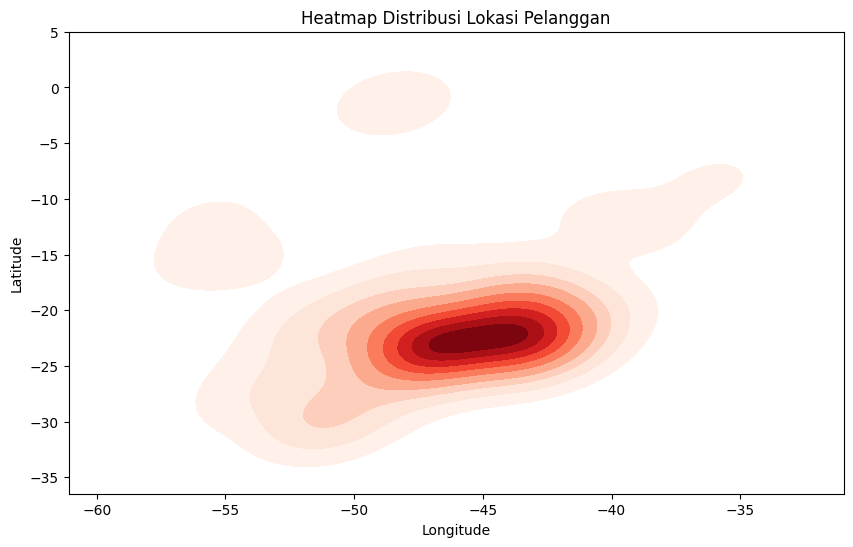

In [73]:
plt.figure(figsize=(10,6))
sns.kdeplot(
    x=sample_data['geolocation_lng'], 
    y=sample_data['geolocation_lat'], 
    cmap="Reds", fill=True
)
plt.title("Heatmap Distribusi Lokasi Pelanggan")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

Pada tahap ini, kita menggunakan seaborn untuk membuat heatmap distribusi lokasi pelanggan, yaitu visualisasi yang menunjukkan kepadatan pelanggan berdasarkan lokasi geografisnya. Tujuan dari tahapan ini :
- Mengidentifikasi area dengan jumlah pelanggan yang tinggi dan yang rendah.
- Memahami pola distribusi geografis pelanggan, misalnya apakah pelanggan lebih banyak berada di kota besar atau tersebar di daerah pedesaan.
- Membuat kontur kepadatan pelanggan menggunakan heatmap.
- Menganalisis sebaran lokasi dengan intensitas tinggi (zona merah) dan rendah (zona lainnya atau kosong).

### RFM Analysis
Metode segmentasi pelanggan yang digunakan dalam analisis bisnis dan pemasaran berdasarkan tiga faktor utama: Recency, Frequency, dan Monetary
Rencana analisis RFM :
1. Menghitung selisih antara tanggal terbaru dalam dataset per pelanggan
2. Menghitung jumlah pesanan per pelanggan
3. Menghitung total pembayaran per pelanggan

In [79]:
# Gabungkan dataset order dengan payment untuk mendapatkan nilai transaksi
rfm_df = orders.merge(payments, on="order_id", how="inner")
# Gabungkan dengan customer untuk mendapatkan informasi customer_id
rfm_df = rfm_df.merge(customers, on="customer_id", how="inner")

# Ambil kolom yang diperlukan
rfm_df = rfm_df[["customer_unique_id", "order_purchase_timestamp", "payment_value"]]

rfm_df.head()

,customer_unique_id,order_purchase_timestamp,payment_value
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,18.12
1,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,2.00
2,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,18.59
3,af07308b275d755c9edb36a90c618231,2018-07-24 20:41:37,141.46
4,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:38:49,179.12


In [80]:
# Tentukan tanggal terbaru dalam dataset sebagai acuan Recency
latest_date = rfm_df["order_purchase_timestamp"].max()

# Hitung metrik RFM
rfm_metrics = rfm_df.groupby("customer_unique_id").agg(
    Recency=("order_purchase_timestamp", lambda x: (latest_date - x.max()).days),
    Frequency=("order_purchase_timestamp", "count"),
    Monetary=("payment_value", "sum")
).reset_index()

rfm_metrics.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,27.19
2,0000f46a3911fa3c0805444483337064,585,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,369,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,336,1,196.89


Perhitungan Metrik RFM untuk setiap pelanggan :
- Recency: Berapa hari sejak transaksi terakhir pelanggan.
- Frequency: Jumlah transaksi pelanggan.
- Monetary: Total nilai transaksi pelanggan.

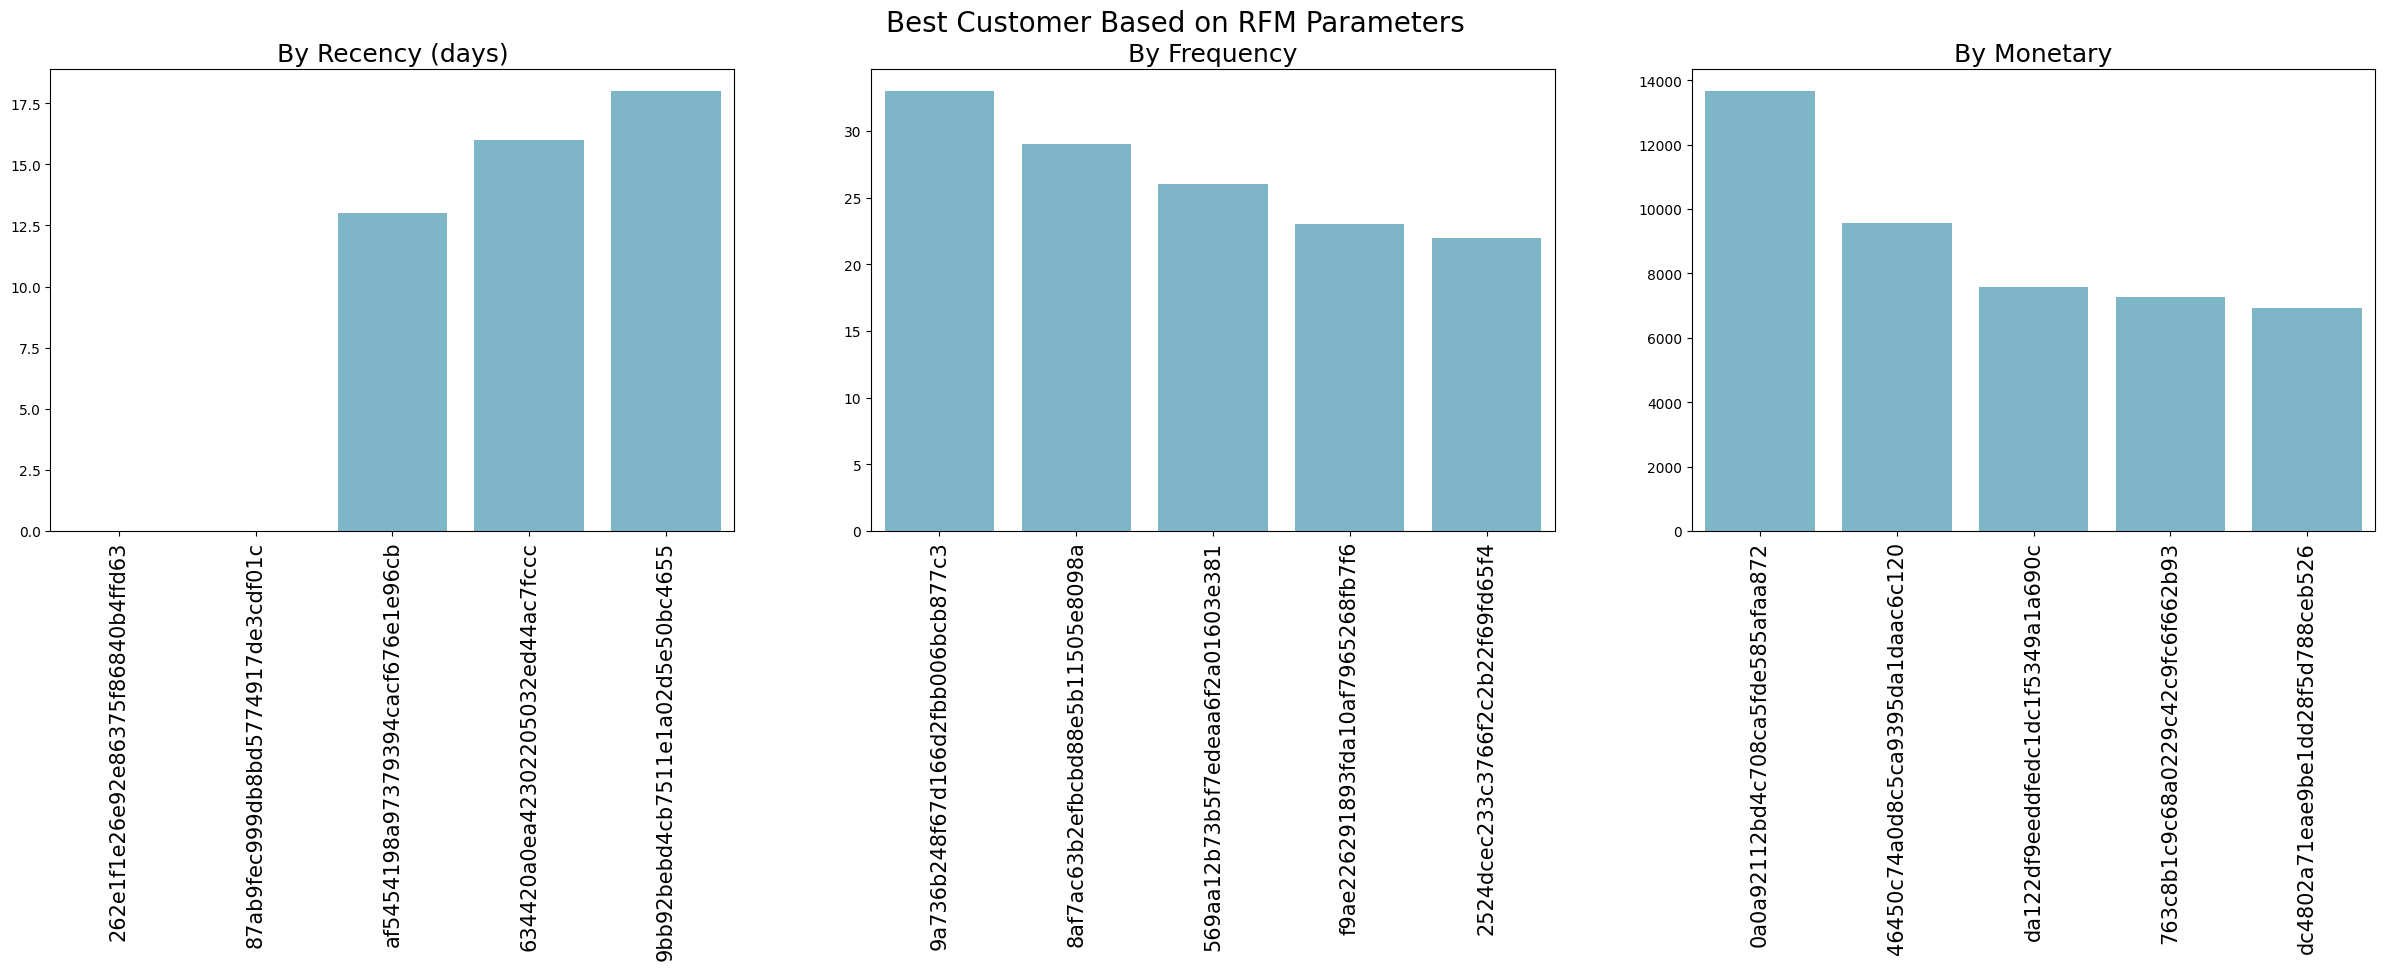

In [92]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
 
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]
rfm_metrics["short_id"] = rfm_metrics["customer_unique_id"].str[:6]

sns.barplot(y="Recency", 
            x="customer_unique_id", 
            data=rfm_metrics.sort_values(by="Recency", ascending=True).head(5), 
            palette=colors, 
            ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelrotation=90, labelsize=15)

sns.barplot(y="Frequency", 
            x="customer_unique_id", 
            data=rfm_metrics.sort_values(by="Frequency", ascending=False).head(5), 
            palette=colors, 
            ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelrotation=90, labelsize=15)
 
sns.barplot(y="Monetary", 
            x="customer_unique_id", 
            data=rfm_metrics.sort_values(by="Monetary", ascending=False).head(5), 
            palette=colors, 
            ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelrotation=90, labelsize=15)
 
plt.suptitle("Best Customer Based on RFM Parameters", fontsize=20)
plt.show()

### Clustering Analysis
mengelompokkan data ke dalam grup berdasarkan kemiripan tertentu tanpa menggunakan teknik machine learning.

- #### Binning Grouping 
Mengelompokkan pelanggan berdasarkan nilai RFM 

In [86]:
# Buat skor RFM dengan metode kuartil (1 = rendah, 4 = tinggi)
rfm_metrics["R_Score"] = pd.qcut(rfm_metrics["Recency"], q=4, labels=[4, 3, 2, 1])
rfm_metrics["F_Score"] = pd.qcut(rfm_metrics["Frequency"].rank(method="first"), q=4, labels=[1, 2, 3, 4])
rfm_metrics["M_Score"] = pd.qcut(rfm_metrics["Monetary"], q=4, labels=[1, 2, 3, 4])

# Gabungkan skor menjadi satu nilai RFM
rfm_metrics["RFM_Score"] = rfm_metrics["R_Score"].astype(str) + \
                           rfm_metrics["F_Score"].astype(str) + \
                           rfm_metrics["M_Score"].astype(str)

# Tampilkan hasil
rfm_metrics.head()

,customer_unique_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,141.90,4,1,3,413
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,27.19,4,1,1,411
2,0000f46a3911fa3c0805444483337064,585,1,86.22,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,369,1,43.62,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,336,1,196.89,2,1,4,214


Berdasarkan skor RFM yang didapat:
- R_Score (Recency): 4 berarti transaksi terakhir masih baru, 1 berarti sudah lama.
- F_Score (Frequency): 4 berarti pelanggan sering bertransaksi, 1 berarti jarang.
- M_Score (Monetary): 4 berarti pelanggan belanja banyak, 1 berarti sedikit.
- RFM_Score: Gabungan dari ketiga skor (misal: 413, berarti Recency tinggi, Frequency rendah, Monetary sedang).

- #### Manual Grouping (berdasarkan RFM Score)
Mengklasifikasikan level pelanggan berdasarkan skor RFM

In [94]:
rfm_metrics["RFM_Score"] = (
    rfm_metrics["R_Score"].astype(int) + 
    rfm_metrics["F_Score"].astype(int) + 
    rfm_metrics["M_Score"].astype(int)
)

def rfm_segment_clustering(score):
    if score >= 10:
        return "VIP"
    elif score >= 7:
        return "Loyal"
    elif score >= 4:
        return "Casual"
    else:
        return "Churned"

rfm_metrics['level_customer'] = rfm_metrics["RFM_Score"].apply(rfm_segment_clustering)

rfm_metrics.head()

,customer_unique_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,short_id,level_customer
0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,141.90,4,1,3,8,000036,Loyal
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,27.19,4,1,1,6,0000b8,Casual
2,0000f46a3911fa3c0805444483337064,585,1,86.22,1,1,2,4,0000f4,Casual
3,0000f6ccb0745a6a4b88665a16c9f078,369,1,43.62,2,1,1,4,0000f6,Casual
4,0004aac84e0df4da2b147fca70cf8255,336,1,196.89,2,1,4,7,0004aa,Loyal


## Visualization & Explanatory Data
- Data visualization merupakan tahapan yang harus kita lakukan sebelum membuat kesimpulan dan mengomunikasikan (draw conclusion & communicate) hasil dari proses analisis yang telah dilakukan. Hal ini dilakukan untuk mempermudah kita dalam memahami data dan membuat sebuah kesimpulan yang andal. Selain itu, visualisasi data juga dapat membantu kita dalam menyampaikan cerita atau temuan dari hasil analisis data kepada orang lain atau stakeholder.

- Explanatory analysis merupakan proses analisis data yang bertujuan untuk membagikan beberapa insight yang menarik dari sebuah data. Insight yang diperoleh dari proses explanatory analysis akan digunakan untuk menjawab permasalahan bisnis yang dihadapi. Insight tersebut juga akan dibagikan kepada orang lain (stakeholder) sehingga perlu disertakan dengan visualisasi data yang baik. 

### 1. Bagaimana distribusi pelanggan berdasarkan lokasi geografis?

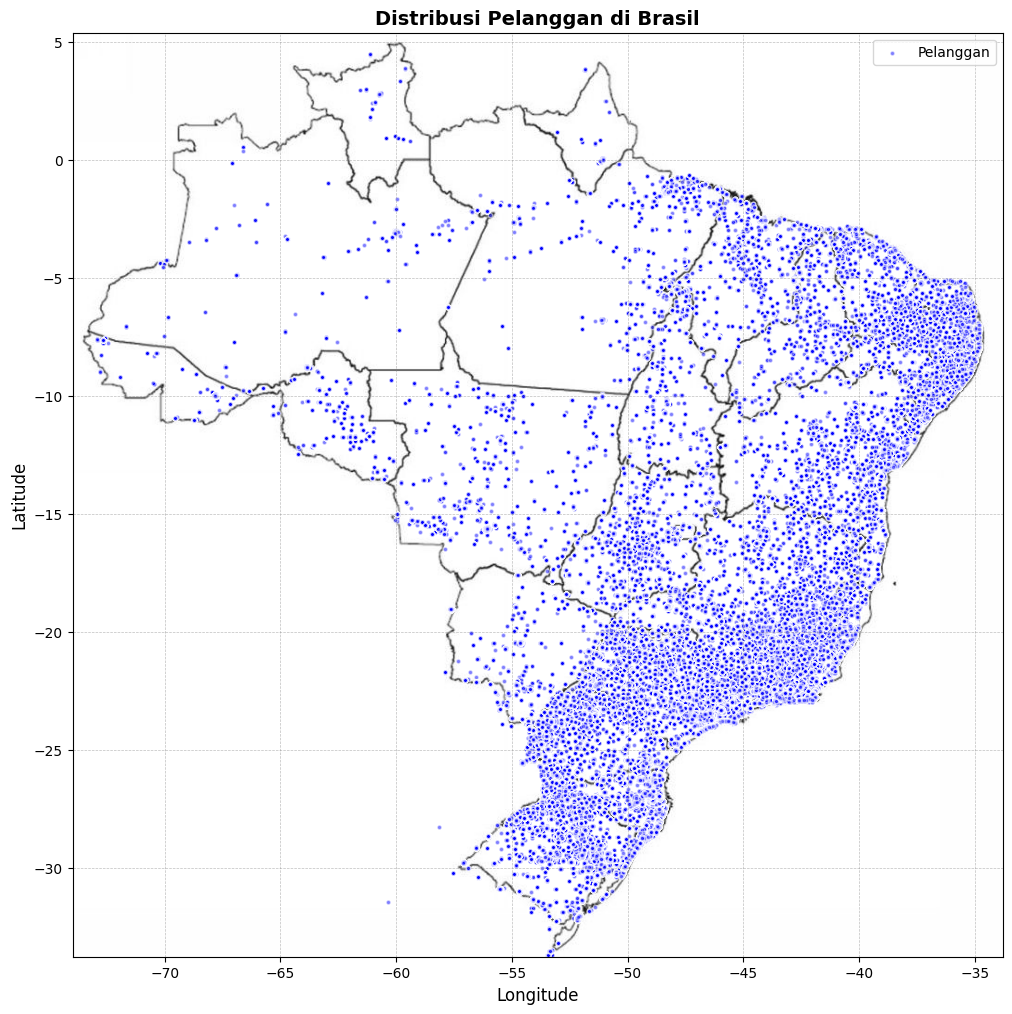

In [74]:
def plot_brazil_map(data):
    # URL gambar peta Brasil
    url = 'https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg'
    
    try:
        # Mengunduh dan membaca gambar dari URL
        response = urllib.request.urlopen(url)
        image_data = io.BytesIO(response.read())
        brazil_map = Image.open(image_data)
        brazil_map = brazil_map.convert("RGB")
    except Exception as e:
        print(f"Error loading map: {e}")
        return
    
    # Tentukan ukuran plot
    fig, ax = plt.subplots(figsize=(12, 12))

    # Konversi gambar ke format numpy array untuk imshow()
    brazil_map = np.array(brazil_map)

    # Plot gambar peta Brasil sebagai latar belakang
    ax.imshow(brazil_map, extent=[-73.9828, -33.8, -33.7511, 5.4], aspect='auto')

    # Scatter plot lokasi pelanggan
    ax.scatter(
        data['geolocation_lng'], 
        data['geolocation_lat'], 
        c='blue', s=10, alpha=0.5, edgecolors='w', label='Pelanggan'
    )

    # Pengaturan label dan batas koordinat
    ax.set_xlim(-73.9828, -33.8)
    ax.set_ylim(-33.7511, 5.4)
    ax.set_xlabel("Longitude", fontsize=12)
    ax.set_ylabel("Latitude", fontsize=12)
    ax.set_title("Distribusi Pelanggan di Brasil", fontsize=14, fontweight='bold')

    # Menambahkan grid untuk referensi
    ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

    # Menambahkan legenda
    ax.legend()

    # Menampilkan plot
    plt.show()

# Panggil fungsi dengan dataset
plot_brazil_map(geolocation)


Dari visualisasi distribusi pelanggan ini di dapatkan kesimpulan :
1. pelanggan terkonsentrasi di Wilayah Tenggara dan Selatan, Wilayah ini merupakan pusat ekonomi dan populasi terbesar di Brasil, dengan banyak kota besar dan infrastruktur yang berkembang.
2. Distribusi menurun di Wilayah Utara dan Tengah, Hal ini dapat dikaitkan dengan faktor geografis seperti hutan hujan Amazon yang luas dan populasi yang lebih jarang.
3. Kepadatan Pelanggan Sejalan dengan Populasi Kota, Ini menunjukkan bahwa layanan atau produk yang didistribusikan dalam dataset ini lebih banyak digunakan di daerah perkotaan.

### 2. Bagaimana tren penjualan bulanan dan tahunan?

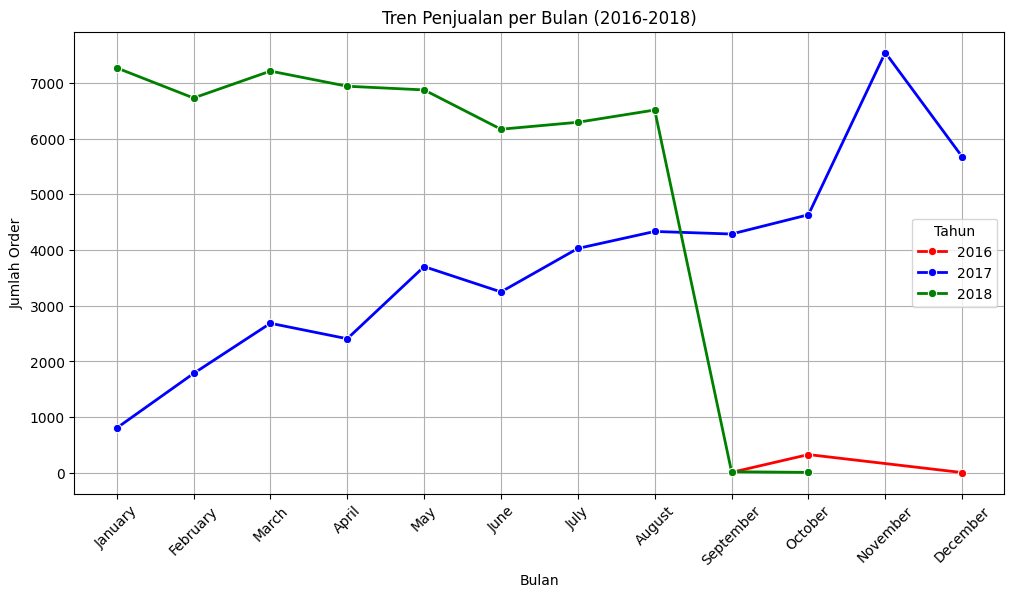

In [75]:
trend_df['purchase_month'] = pd.Categorical(trend_df['purchase_month'], categories=calendar.month_name[1:], ordered=True)

custom_palette = {2016: "red", 2017: "blue", 2018: "green"}

# Buat plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=trend_df, x="purchase_month", y="order_count", hue="purchase_year", 
             marker="o", palette=custom_palette, linewidth=2)

# Format sumbu x dengan nama bulan
plt.xticks(rotation=45)
plt.xlabel("Bulan")
plt.ylabel("Jumlah Order")
plt.title("Tren Penjualan per Bulan (2016-2018)")
plt.legend(title="Tahun")
plt.grid(True)

plt.show()

Penjelasan Visualisasi Tren Penjualan Per Bulan (2016-2018) :
1. Peningkatan Tren dari 2016 ke 2018, Jumlah order di 2016 sangat rendah, terlihat dari garis merah yang hampir mendekati sumbu x. 2017 menunjukkan pertumbuhan yang signifikan, dengan tren yang meningkat hampir setiap bulan. 2018 memiliki jumlah order tertinggi di awal tahun, tetapi mengalami penurunan drastis pada bulan September, sebelum kembali naik.
2. Puncak Order Terjadi pada Akhir Tahun, Tahun 2017 dan 2018 mengalami lonjakan signifikan pada November, menandakan adanya peningkatan aktivitas
3. Pada September 2018, jumlah order turun hampir ke nol, berbeda dengan tren sebelumnya yang cukup stabil.

### 3. Berapa banyak pelanggan yang memberikan ulasan atau peringkat di atas 4?

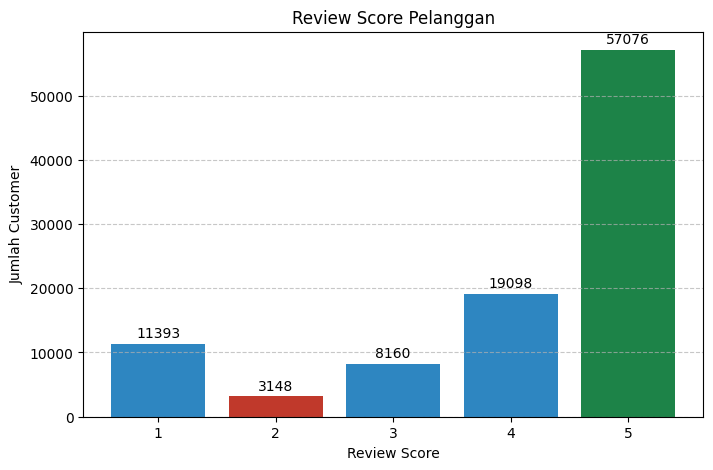

In [76]:
review_scores = review_data['review_score']
customer_counts = review_data['customer_id']

colors = ['#2E86C1'] * len(review_scores)  # Default warna biru elegan
colors[customer_counts.idxmax()] = '#1D8348'  # Warna hijau untuk nilai tertinggi
colors[customer_counts.idxmin()] = '#C0392B'  # Warna merah untuk nilai terendah

# Membuat bar chart
plt.figure(figsize=(8,5))
plt.bar(review_scores, customer_counts, color=colors)

# Menambahkan judul dan label
plt.title('Review Score Pelanggan')
plt.xlabel('Review Score')
plt.ylabel('Jumlah Customer')

# Menampilkan nilai di atas setiap batang
for i, v in enumerate(customer_counts):
    plt.text(review_scores[i], v + 1000, str(v), ha='center', fontsize=10)

# Menampilkan grafik
plt.xticks(review_scores)  # Memastikan sumbu x sesuai dengan review score
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Grafik ini menunjukkan distribusi Review Score Pelanggan, di mana:
- Mayoritas pelanggan puas dengan produk atau layanan yang diberikan (terlihat dari dominasi skor 5 dan 4).
- Sebagian kecil pelanggan tidak puas, tetapi jumlahnya jauh lebih kecil dibanding yang puas.
- Tingkat kepuasan pelanggan secara keseluruhan tinggi, namun tetap ada ruang untuk perbaikan terhadap pelanggan yang memberikan skor rendah.

### 4. Kategori Produk mana yang paling banyak dan paling sedikit terjual?

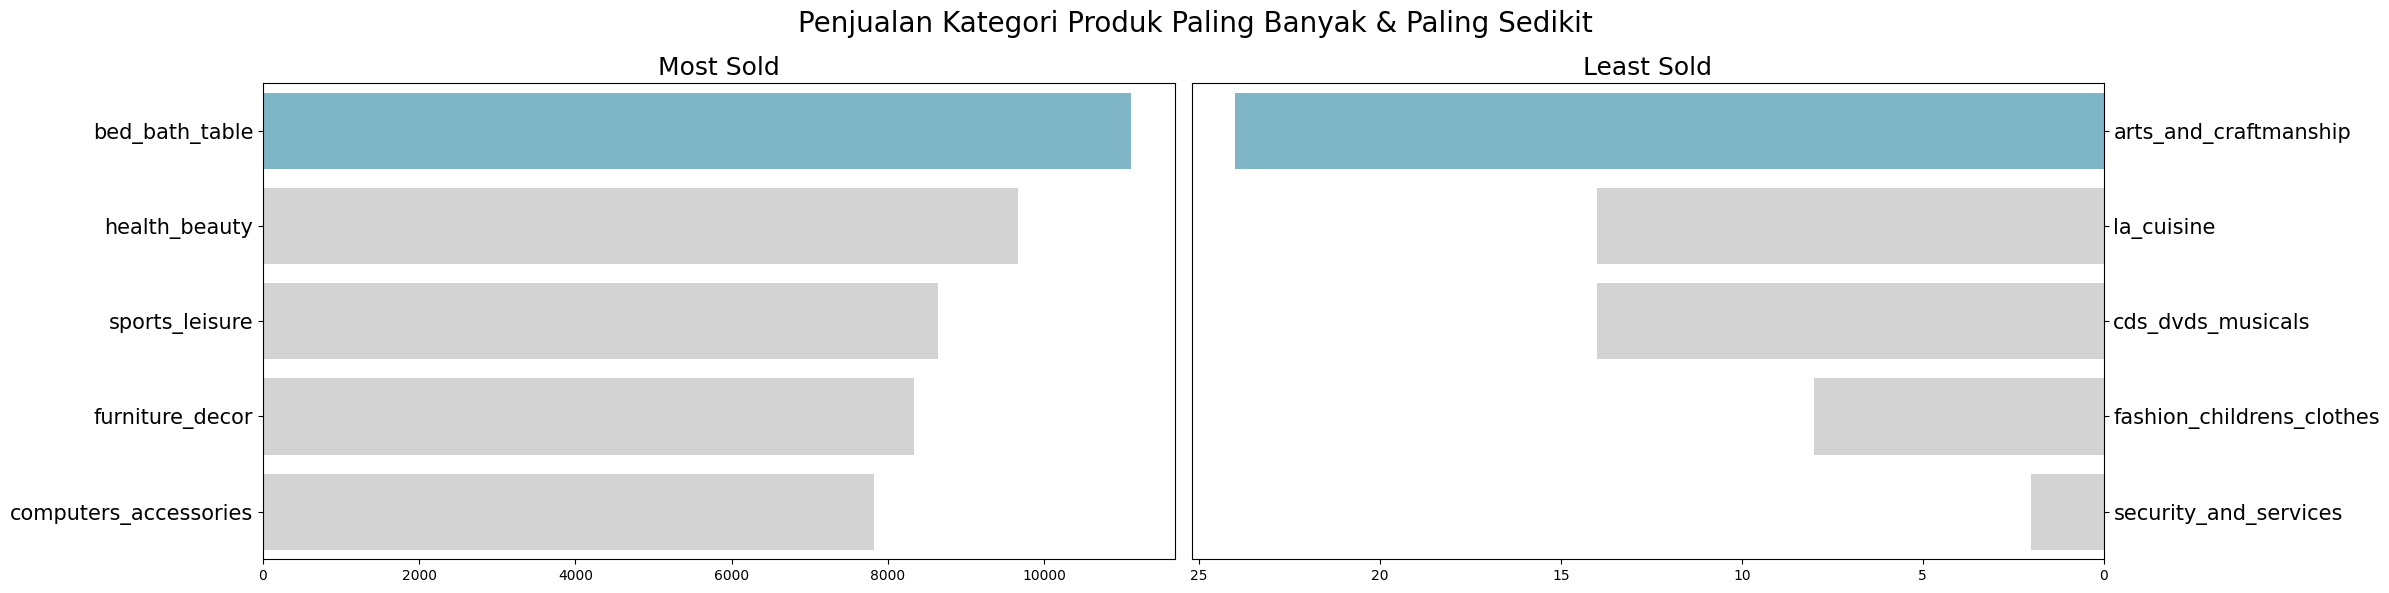

In [77]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    y="product_category_name_english", 
    x="total_sold", 
    data=most_sold, 
    palette=colors,
    ax=ax[0])

ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Most Sold", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(
    y="product_category_name_english", 
    x="total_sold", 
    data=least_sold, 
    palette=colors,
    ax=ax[1])

ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Least Sold", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Penjualan Kategori Produk Paling Banyak & Paling Sedikit", fontsize=20)
plt.tight_layout()
plt.show()

Grafik ini menampilkan dua kategori produk berdasarkan jumlah penjualan:
1. Most Sold (Produk dengan Penjualan Tertinggi) – Grafik Kiri
   - Kategori "bed_bath_table" memiliki penjualan tertinggi, diikuti oleh "health_beauty" dan "sports_leisure".
   - Produk dalam kategori "bed_bath_table" adalah yang paling laris, kemungkinan besar karena kebutuhan rumah tangga yang tinggi.
   - Kategori "health_beauty" juga cukup tinggi, menandakan minat konsumen dalam produk kesehatan dan kecantikan.
2. Least Sold (Produk dengan Penjualan Terendah) – Grafik Kanan
   - Kategori "arts_and_craftmanship" memiliki penjualan terendah, diikuti oleh "la_cuisine" dan "cds_dvds_musicals".
   - Produk dengan penjualan rendah seperti "arts_and_craftmanship" dan "cds_dvds_musicals" mungkin kurang diminati karena faktor tren atau pergeseran ke alternatif digital.

### 5. Bagaimana pelanggan membayar produk yang mereka pesan atau beli?

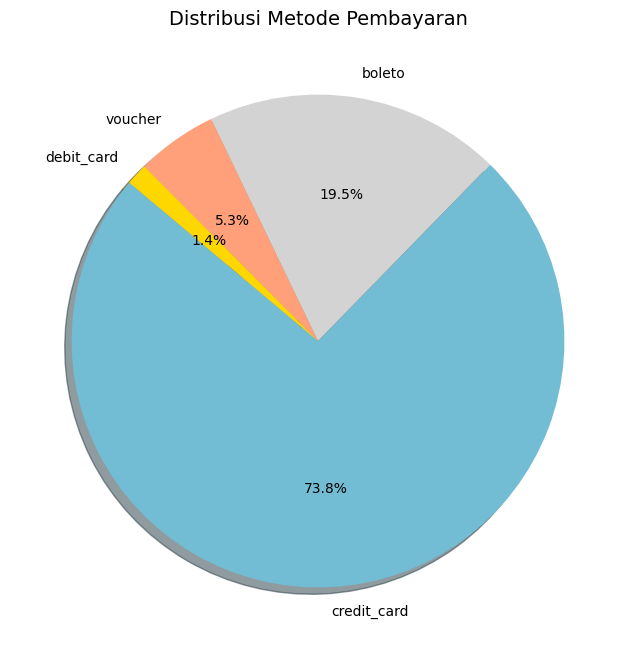

In [78]:
labels = full_products_payments['payment_type']
sizes = full_products_payments['total_count']
colors = ['#72BCD4', '#D3D3D3', '#FFA07A', '#FFD700']

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, shadow=True, startangle=140)
plt.title("Distribusi Metode Pembayaran", fontsize=14)
plt.show()

Grafik ini menunjukkan distribusi metode pembayaran yang digunakan oleh pelanggan.
1. Credit Card (73.8%) – Mayoritas transaksi dilakukan menggunakan kartu kredit, yang menunjukkan bahwa pelanggan lebih memilih metode ini karena kemudahan dan fleksibilitasnya.
2. Boleto (19.5%) – Metode pembayaran kedua yang paling banyak digunakan. Boleto adalah metode pembayaran berbasis voucher yang populer di beberapa negara seperti Brasil.
3. Voucher (5.3%) – Penggunaan voucher cukup rendah dibandingkan metode lainnya, yang mungkin digunakan dalam program promosi atau diskon tertentu.
4. Debit Card (1.4%) – Merupakan metode pembayaran dengan persentase terkecil, yang mungkin disebabkan oleh keterbatasan penggunaan atau preferensi pelanggan terhadap kartu kredit.

## Conclusion

- <h3>Pertanyaan :</h3>
1. Bagaimana distribusi pelanggan berdasarkan lokasi geografis?
2. Bagaimana tren penjualan bulanan dan tahunan?
3. Berapa banyak pelanggan yang memberikan ulasan atau peringkat di atas 4?
4. Kategori Produk mana yang paling banyak dan paling sedikit terjual?
5. Bagaimana pelanggan membayar produk yang mereka pesan atau beli?

- <h3>Kesimpulan :</h3>
1. Distribusi pelanggan menunjukkan konsentrasi tinggi di Wilayah Tenggara dan Selatan Brasil, yang merupakan pusat ekonomi dan populasi terbesar dengan infrastruktur yang lebih berkembang. Sebaliknya, distribusi pelanggan menurun di Wilayah Utara dan Tengah, kemungkinan dipengaruhi oleh faktor geografis seperti hutan hujan Amazon dan populasi yang lebih jarang. Selain itu, kepadatan pelanggan sejalan dengan populasi kota, menandakan bahwa layanan atau produk dalam dataset ini lebih banyak digunakan di daerah perkotaan dibandingkan dengan daerah pedesaan atau terpencil.

2. Tren penjualan per bulan dari 2016 hingga 2018 menunjukkan peningkatan signifikan, di mana jumlah order pada 2016 masih sangat rendah, kemudian mengalami pertumbuhan pesat pada 2017 dengan tren yang meningkat hampir setiap bulan. Pada 2018, jumlah order mencapai puncaknya di awal tahun namun mengalami penurunan drastis pada September sebelum kembali naik. Pola penjualan juga menunjukkan lonjakan signifikan pada akhir tahun, terutama pada November 2017 dan 2018, yang menandakan peningkatan aktivitas. Penurunan tajam pada September 2018 menjadi anomali dalam tren yang sebelumnya relatif stabil.

3. Distribusi Review Score Pelanggan menunjukkan bahwa mayoritas pelanggan puas dengan produk atau layanan yang diberikan, terlihat dari dominasi skor 5 dan 4. Sementara itu, hanya sebagian kecil pelanggan yang tidak puas, dengan jumlah yang jauh lebih sedikit dibandingkan pelanggan yang memberikan skor tinggi. Secara keseluruhan, tingkat kepuasan pelanggan cukup tinggi, namun masih terdapat ruang untuk perbaikan guna meningkatkan pengalaman bagi pelanggan yang memberikan skor rendah.

4. Kategori produk dengan penjualan tertinggi adalah "bed_bath_table," diikuti oleh "health_beauty" dan "sports_leisure," yang mencerminkan tingginya permintaan akan kebutuhan rumah tangga serta produk kesehatan dan kecantikan. Sebaliknya, kategori dengan penjualan terendah adalah "arts_and_craftmanship," "la_cuisine," dan "cds_dvds_musicals," yang kemungkinan kurang diminati akibat perubahan tren atau pergeseran ke alternatif digital. Hal ini mengindikasikan bahwa preferensi konsumen lebih condong ke produk kebutuhan sehari-hari dibandingkan dengan barang seni atau media fisik.

5. Mayoritas pelanggan (73.8%) lebih memilih menggunakan kartu kredit sebagai metode pembayaran karena kemudahan dan fleksibilitasnya, sementara boleto menjadi metode kedua yang paling banyak digunakan (19.5%), mencerminkan popularitas sistem pembayaran berbasis voucher di beberapa negara seperti Brasil. Penggunaan voucher hanya mencapai 5.3%, kemungkinan besar terkait dengan program promosi atau diskon tertentu, sedangkan debit card memiliki persentase terkecil (1.4%), yang mungkin disebabkan oleh keterbatasan penggunaannya atau preferensi pelanggan yang lebih condong ke kartu kredit.